In [1]:
%%time
import gzip
from tensorflow.keras.utils import to_categorical

CPU times: user 2.46 s, sys: 1.55 s, total: 4.02 s
Wall time: 1.97 s


In [2]:
%%time
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.version.version
np.seterr(all="ignore")

CPU times: user 95.8 ms, sys: 47.5 ms, total: 143 ms
Wall time: 144 ms


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
%%time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity, OneQubitEulerDecomposer
from qiskit import  Aer, transpile, IBMQ, assemble
from qiskit.circuit.library import CHGate
from qiskit.quantum_info.operators import Operator
from qiskit.aqua.operators import PrimitiveOp, CircuitStateFn
from qiskit.aqua.operators.primitive_ops import MatrixOp
from qiskit.aqua.operators.converters import CircuitSampler
from qiskit.aqua.operators.expectations import MatrixExpectation
from qiskit.aqua.operators.list_ops import ComposedOp
from qiskit.aqua.operators import ListOp
from qiskit.aqua.components.initial_states import Zero
import qiskit

CPU times: user 886 ms, sys: 210 ms, total: 1.1 s
Wall time: 1.04 s


In [4]:
%%time
# from Lie_alge.Sophus.py.sophus import so2, so3
from geomstats.geometry.special_orthogonal import SpecialOrthogonal
from geomstats.learning.pca import TangentPCA

INFO: Using numpy backend


CPU times: user 80.9 ms, sys: 9.92 ms, total: 90.8 ms
Wall time: 89.3 ms


In [5]:
%%time
provider = IBMQ.load_account()

__init__.discover_credentials:INFO:2021-05-04 17:05:45,726: Using credentials from qiskitrc


CPU times: user 101 ms, sys: 0 ns, total: 101 ms
Wall time: 2.48 s


In [6]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [7]:
%%time
# print(Aer.backends())
simulator = Aer.get_backend("statevector_simulator") # unable to run on current quantum architechture, due to circuit incompatability
my_sampler = CircuitSampler(backend=simulator, attach_results=True, param_qobj=False)
my_expectation = MatrixExpectation()

CPU times: user 4.28 ms, sys: 0 ns, total: 4.28 ms
Wall time: 3.39 ms


/home/john/.local/lib/python3.9/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',


In [8]:
%%time
# EMNIST decoder

decoder = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [9]:
%%time
images_raw = gzip.open("data/MNIST/MNIST_GZ/train-images-idx3-ubyte.gz", "r")
labels_raw = gzip.open("data/MNIST/MNIST_GZ/train-labels-idx1-ubyte.gz")


image_size = 28
num_images = 128 # 8192 # how many images per batch

images_raw.read(16) # reads the data type
labels_raw.read(8) # reads the data type

def get_data(images, labels):
    buf_images = images.read(image_size * image_size * num_images)
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(num_images, image_size, image_size, 1)
    
    buf_labels = labels.read(num_images)
    labels = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int32)
    
    return images, labels

CPU times: user 2.34 ms, sys: 1.14 ms, total: 3.48 ms
Wall time: 8.43 ms


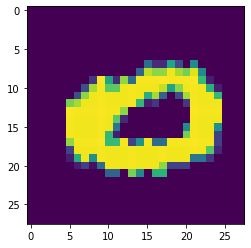

0
CPU times: user 96.5 ms, sys: 1.66 ms, total: 98.2 ms
Wall time: 95.8 ms


In [10]:
%%time
# print images
data = get_data(images_raw, labels_raw)

images = data[0]
labels = data[1]



sort_index = np.argsort(data[1], axis=0)

sorted_images = data[0][sort_index]
sorted_labels = data[1][sort_index]

sorted_data = sorted_images, sorted_labels

image = np.asarray(sorted_images[1]).T.squeeze()
plt.imshow(image)
plt.show()

print(decoder[sorted_labels[1]])

In [11]:
%%time
np.set_printoptions(threshold=2 ** 10 + 1)
print(sorted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8
 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9]
CPU times: user 0 ns, sys: 375 µs, total: 375 µs
Wall time: 380 µs


In [12]:
%%time
def get_num_cls(data):
    labels = np.array(data[1])
    one_hot_labels = to_categorical(labels)
    
    return one_hot_labels.shape[1]


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [13]:
%%time
N = get_num_cls(data)
print("Number of classes = ", N)

10
CPU times: user 534 µs, sys: 254 µs, total: 788 µs
Wall time: 461 µs


In [14]:
class AdamOptim():
    """From https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc"""
    def __init__(self, num_of_keys=N, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw = {key: 0 for key in range(num_of_keys)}
        self.v_dw = {key: 0 for key in range(num_of_keys)}
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, key, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw[key] = self.beta1*self.m_dw[key] + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw[key] = self.beta2*self.v_dw[key] + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw[key]/(1-self.beta1**t + self.epsilon)
        m_db_corr = self.m_db/(1-self.beta1**t + self.epsilon)
        v_dw_corr = self.v_dw[key]/(1-self.beta2**t + self.epsilon)
        v_db_corr = self.v_db/(1-self.beta2**t + self.epsilon)

        ## update weights and biases
        w = w + self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b + self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [54]:


class Forward_and_backward:
    """Bassed off of:
        https://arxiv.org/pdf/1908.08385.pdf
        also see:
        https://qiskit.org/documentation/stubs/qiskit.circuit.library.CHGate.html
    """
    def __init__(self, N, data, num_of_it):
        """Inits values:
            self.num_of_it: number of iterations
            self.target_N: the number of classes
            self.data: the data to classify and train with
            self.alpha: a learnable parameter simular to biases
            self.total_error: The total error per class starting with class 0 and ending at class N. Is a dict containing the errors per epoch
            self.set_lie_alge: If true gets a new set of lie algebras if flase saves the current set for calculations
            self.cumulative_error: the cumulative error over iterations
            """
        self.num_of_it = num_of_it
        self.target_N = N
        self.data = data
        self.alpha = np.arange(start=1, stop=self.target_N ** 2 + 1, dtype=np.complex_) # kind of like biases
        self.total_error = {}
        self.set_lie_alge = True
        self.cumulative_error = 0
    
    def H(self):
        """"""
        epsilon = 0.00001
        euler = self.A() * self.SU_Nm1 * np.exp(1j * np.sum(self.lie_alge) * np.sum(self.alpha))
        euler = OneQubitEulerDecomposer("ZYZ").angles(euler + epsilon)
        
        def map_circuit(k, qc_k):
            """"""
            for i in range(self.target_N):
                try:
                    qc_k.cx(k, i) @ (np.asarray(euler)[np.newaxis]).T
                except:
                    continue

        qr = QuantumRegister(self.target_N, "qreg")
        qc_k = QuantumCircuit(qr, name="qc_k")
        
        for k in range(1, self.target_N + 1):
            qc_k.initialize([np.sqrt(1/2), np.sqrt(1/2)], qubits=k - 1) # might be 1, 0
        
        for k in range(self.target_N):
            map_circuit(k, qc_k)

        op = PrimitiveOp(qc_k)
        h = []
        for i in range(self.x.shape[2]):
            h.append(op)
            
        h = np.asarray(h, dtype=object)[:np.newaxis]
        H_op = np.asarray(h / np.sqrt(self.target_N, dtype=np.complex_), dtype=object) 
        
        return H_op
        
    def quNit(self, SU_of_N):
        """"""
        S3 =np.zeros(shape=(self.target_N, self.target_N), dtype=np.complex_)
        np.fill_diagonal(S3, -(self.target_N - 1) / 2)
        sum_of_weights = np.sum(np.asarray([w @ x for w, x in zip(self.W[self.i], self.x)]), axis=0)
        Z = np.exp((1j) * S3) 

        self.lie_alge = self.lie_algebra(SU_of_N)
        
        qn = Z @ (sum_of_weights @ self.H()).T
        return qn

 ##################################################   

    def A(self):
        a = []
        epsilon = 1e-08
        
        for k in range(2, self.target_N + 1):
            val = np.exp(1j * self.lie_alge[3] * self.alpha[2 * k - 3] * np.exp(1j * self.lie_alge[((k - 1) ** 2 + 1)] * self.alpha[2 * (k - 1)]))
            a.append(val + epsilon) 
        
        return np.prod(a) 
    
    def SU_of_N(self, n):
        """"""
        son = SpecialOrthogonal(n=n, point_type='matrix')
        metric = son.bi_invariant_metric

        data = son.random_uniform(n_samples=(n))

        tpca = TangentPCA(metric=metric, n_components=(n))  ## SELF.TARGET_N?
        tpca = tpca.fit(data)
        tangent_projected_data = tpca.transform(data)

        return tangent_projected_data

    def lie_algebra(self, SU_N):
        """"""
        if self.set_lie_alge == True:
            self.set_lie_alge = False
            i = 0
            epsilon = 1e-10
            lie_algebras = []
            while i < self.target_N ** 2:
                # print("working on lie algebra {} / {}".format(i, self.target_N ** 2))
                delta = epsilon * np.random.uniform(low=-1, high=1, size=(1))
                mat = np.full((self.target_N, self.target_N), delta)
                np.fill_diagonal(mat, 0)
                if not np.linalg.det(mat):
                    continue
                else:
                    i += 1
                    lie = mat 
                    lie_algebras.append(lie)
                    # print(lie)

            return np.asarray(lie_algebras, dtype= complex)

        else:
            return self.lie_alge
    ############################################
    
    
    def forward(self):
        """"""
        SU_N = self.SU_N
        ket_x = self.quNit(SU_N)
        
        ket_x = SU_N @ ket_x

        ket_x_list = []

        for k, op in enumerate(ket_x):
            cr = ClassicalRegister(self.target_N, "creg{}".format(k))
            qc = my_expectation.convert(op)
            qc = qc.to_circuit()
            qc.add_register(cr)
            qc.measure_all([val for val in range(self.target_N - 1)])
            qobj = assemble(qc, shots= 2 ** self.target_N)
            job = simulator.run(qobj)
            vec = job.result().get_statevector(qc, decimals=10)
            ket_x_list.append(vec)
        
        ket_x = np.asarray(ket_x_list)

        def Purity(N, ket_x):
            """"""
            bra_x = np.asmatrix(ket_x).H
            
            return ((ket_x @ bra_x) / N) ** 2
            
        Pa = Purity(self.target_N, ket_x)
        Pa = np.diag(Pa)
        Pb = np.argmax(Pa)
        print("probibility distiribution = ", Pa.real)

        return Pb, ket_x

    def backward(self, pred_dict):
        """"""
        SU_N = self.SU_N
        qc = self.H()
        Mk = self.target_N
        
        ket_x = pred_dict[decoder[self.i]][1]
        
        Pk = np.sum((np.matrix(ket_x) @ np.matrix(ket_x).H)  / Mk)
        
        Pk = np.asarray(np.asmatrix(SU_N) * Pk * np.asmatrix(SU_N).H, dtype=np.complex_)
        Pk = np.diagonal(Pk.real)

        self.total_error[self.i] = (1 - Pk) / Mk
        
        self.cumulative_error += (Pk) / (self.j + 1)
        
        for i, value in enumerate(self.cumulative_error):
            print("Total error of {} = {}".format(i, (value)))
        print("Prediction for class = ", np.argmin(self.cumulative_error))
        
    def train(self):
        """"""
        adam = AdamOptim(num_of_keys=self.target_N)
        pred_dict = {}
        init_W = True
        sums_of_errors = []
        self.W = {}
        self.SU_N = self.SU_of_N(self.target_N)
        self.SU_Nm1 = self.SU_of_N(self.target_N - 1)

        for i in range(self.target_N):
            init_W = True
            self.set_lie_alge = True
            for j in range(self.num_of_it):
                self.i = i
                self.j = j
                print("working on {}s".format(decoder[i]))
                print("iteration {} / {}".format(j, self.num_of_it))
                sorted_images = self.data[0]
                sorted_labels = self.data[1]
                y = sorted_labels[sorted_labels == i]
                self.x = sorted_images[sorted_labels == i]

                try:
                    self.x = self.x.squeeze(axis=(0, -1))
                except(ValueError):
                    self.x = self.x.squeeze(axis=-1)

                if init_W:
                    print("init W")
                    self.W[self.i] = np.random.random(size=(self.x.shape[0], self.target_N, self.x.shape[2])) # learnable similar to weights

                pred_dict[decoder[i]] = self.forward()
                self.backward(pred_dict)

                print(self.total_error[self.i])
                
                dw = (np.asarray([w @ w.T for w in self.W[self.i]], dtype=np.complex_) @ self.total_error[self.i])[:, :, np.newaxis]
                db = self.alpha  @ self.alpha.T * np.sum(self.total_error[self.i])

                self.W[self.i], self.alpha = adam.update(key=i, t=j, w=self.W[self.i], b=self.alpha, dw=dw, db=db)

                init_W = False
            
            sums_of_errors.append(self.cumulative_error)
            self.cumulative_error = 0
            self.alpha = np.arange(start=1, stop=self.target_N ** 2 + 1, dtype=np.complex_)
        

In [55]:
# %time
train = Forward_and_backward(N, sorted_data, 2)

In [ ]:
%%time
train.train()

working on 0s
iteration 0 / 2
init W


<ipython-input-54-9dba8e886217>:35: FutureWarning: The input object of type 'CXGate' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'CXGate', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  qc_k.cx(k, i) @ (np.asarray(euler)[np.newaxis]).T
